In [ ]:
import pandas as pd 
!pip install prophet
from prophet import Prophet
import os 
import matplotlib.pyplot as plt
import sklearn
import datetime as dt
import numpy as np
import math
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import mean_squared_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xlrd import xlsx
df = pd.read_excel('Case Study 2 Data Excel.xlsx')
CS = pd.read_excel('Case Study 2 Data Excel.xlsx',sheet_name = "Case Study 2 Data")
Craft_Beer = pd.read_excel('Case Study 2 Data Excel.xlsx',sheet_name = "CraftBeer")
Whiskey = pd.read_excel('Case Study 2 Data Excel.xlsx',sheet_name = "Whiskey")
White_Wine = pd.read_excel('Case Study 2 Data Excel.xlsx',sheet_name = "WhiteWine")


In [ ]:
df1=Craft_Beer
df2=Whiskey
df3=White_Wine

In [ ]:
##Converting the year and month column to a single column
df1['Date'] = pd.to_datetime(df1[['Year','Month']].assign(Day=1))
df2['Date'] = pd.to_datetime(df2[['Year','Month']].assign(Day=1))
df3['Date'] = pd.to_datetime(df3[['Year','Month']].assign(Day=1))

In [ ]:
df1.drop(columns=['Year','Month'],axis=1,inplace=True)
df2.drop(columns=['Year','Month'],axis=1,inplace=True)


In [ ]:
##Renaming the relative interest columns a unique name for all sheets
df1.rename(columns = {'Relative Interest':'RL1'}, inplace = True)
df2.rename(columns = {'Relative Interest':'RL2'}, inplace = True)
df3.rename(columns = {'Relative Interest':'RL3'}, inplace = True)

In [ ]:
## Your code here
print(df1.head())
print(df1.tail())

   RL1       Date
0    6 2010-01-01
1    9 2010-02-01
2   15 2010-03-01
3   12 2010-04-01
4   17 2010-05-01
    RL1       Date
67   84 2015-08-01
68   75 2015-09-01
69   66 2015-10-01
70   66 2015-11-01
71   70 2015-12-01


In [ ]:
## Your code here
print(df2.head())
print(df2.tail())

   RL2       Date
0   41 2010-01-01
1   42 2010-02-01
2   44 2010-03-01
3   41 2010-04-01
4   39 2010-05-01
    RL2       Date
67   69 2015-08-01
68   63 2015-09-01
69   65 2015-10-01
70   87 2015-11-01
71  100 2015-12-01


In [ ]:
## Your code here
print(df3.head())
print(df3.tail())

   Year  Month  RL3       Date
0  2010      1   54 2010-01-01
1  2010      2   54 2010-02-01
2  2010      3   58 2010-03-01
3  2010      4   52 2010-04-01
4  2010      5   61 2010-05-01
    Year  Month  RL3       Date
67  2015      8   81 2015-08-01
68  2015      9   72 2015-09-01
69  2015     10   70 2015-10-01
70  2015     11   83 2015-11-01
71  2015     12  100 2015-12-01


In [ ]:
df4=pd.merge(df1,df2,on="Date",how="left")
df5=pd.merge(df4,df3,on="Date",how="left")
df5

,RL1,Date,RL2,Year,Month,RL3
0,6,2010-01-01,41,2010,1,54
1,9,2010-02-01,42,2010,2,54
2,15,2010-03-01,44,2010,3,58
3,12,2010-04-01,41,2010,4,52
4,17,2010-05-01,39,2010,5,61
...,...,...,...,...,...,...
67,84,2015-08-01,69,2015,8,81
68,75,2015-09-01,63,2015,9,72
69,66,2015-10-01,65,2015,10,70
70,66,2015-11-01,87,2015,11,83


In [ ]:
df6=df5.set_index('Date')
df6


,RL1,RL2,Year,Month,RL3
Date,,,,,
2010-01-01,6,41,2010,1,54
2010-02-01,9,42,2010,2,54
2010-03-01,15,44,2010,3,58
2010-04-01,12,41,2010,4,52
2010-05-01,17,39,2010,5,61
...,...,...,...,...,...
2015-08-01,84,69,2015,8,81
2015-09-01,75,63,2015,9,72
2015-10-01,66,65,2015,10,70


In [ ]:
df7=df6.drop(columns=['Year','Month'],axis=1)

In [ ]:
df7

,RL1,RL2,RL3
Date,,,
2010-01-01,6,41,54
2010-02-01,9,42,54
2010-03-01,15,44,58
2010-04-01,12,41,52
2010-05-01,17,39,61
...,...,...,...
2015-08-01,84,69,81
2015-09-01,75,63,72
2015-10-01,66,65,70


In [ ]:
## Calculating for 1st Order differencing
df8=df7[['RL3']].copy()


In [ ]:
df8['RL3 12th Difference']=df8['RL3']-df8['RL3'].shift(12)
df8.head(16)

,RL3,RL3 12th Difference
Date,,
2010-01-01,54,NaN
2010-02-01,54,NaN
2010-03-01,58,NaN
2010-04-01,52,NaN
2010-05-01,61,NaN
2010-06-01,59,NaN
2010-07-01,67,NaN
2010-08-01,64,NaN
2010-09-01,56,NaN


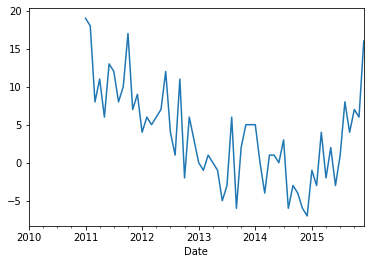

In [ ]:
## Whitewine 12th difference plot
df8['RL3 12th Difference'].plot()

In [ ]:
## To check stationarity for 12th order difference dataset
from statsmodels.tsa.stattools import adfuller
adfuller_test(df8['RL3 12th Difference'].dropna())

ADF Test Statistic : -2.884228173738616
p-value : 0.04721302655286903
#Lags Used : 1
Number of Observations Used : 58
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
## Calculating lags using Partial Autocorrelation method
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
df8['Sarima']=np.nan
df8['Mean_Baseline']=np.nan
df8['Naive_Baseline']=np.nan
df8['Seasonal_Naive_Baseline']=np.nan
df8['Drift_Baseline']=np.nan
df8

,RL3,RL3 12th Difference,Sarima,Mean_Baseline,Naive_Baseline,Seasonal_Naive_Baseline,Drift_Baseline
Date,,,,,,,
2010-01-01,54,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,54,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-01,58,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,52,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-01,61,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2015-08-01,81,8.0,NaN,NaN,NaN,NaN,NaN
2015-09-01,72,4.0,NaN,NaN,NaN,NaN,NaN
2015-10-01,70,7.0,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


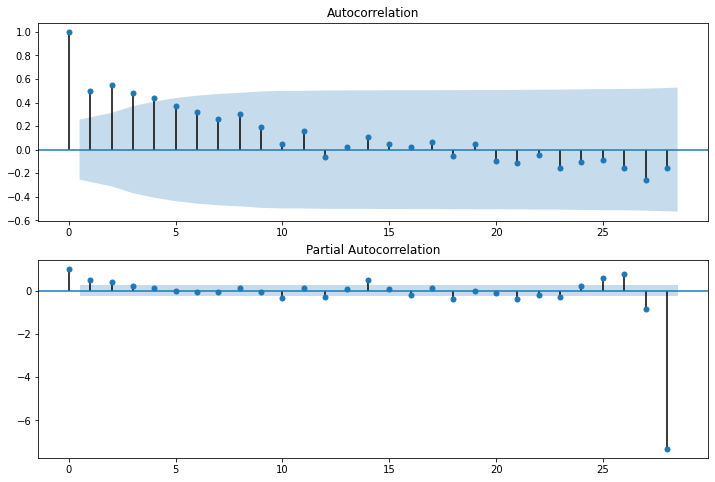

In [ ]:
## PACF for Whitewine
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df8.iloc[13:,[1]],lags=28,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df8.iloc[13:,[1]],lags=28,ax=ax2)

In [ ]:
df10=df8.copy()

In [ ]:
## We can incur that the number of lags is 2 since the last dot outside the shaded region is 2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting auto

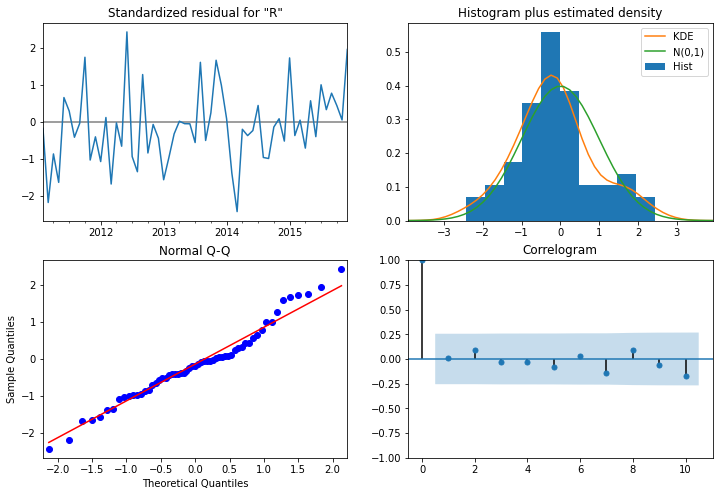

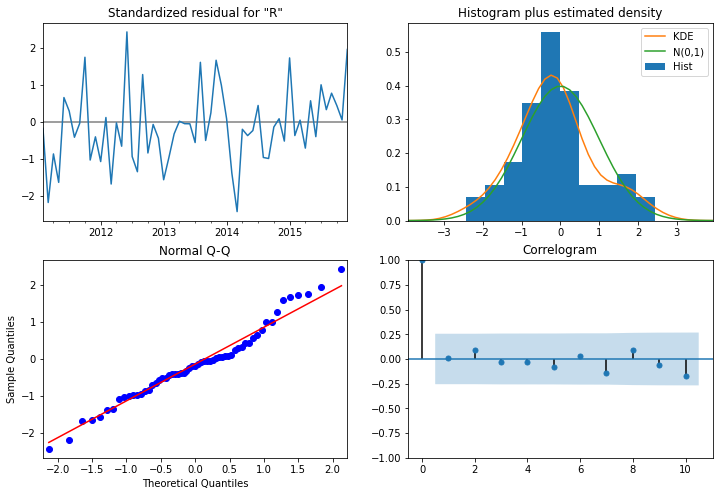

In [ ]:
## Fitting model for CraftBeer dataframe
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.api as smtsa
from statsmodels.tsa import arima_process

model_whitewine=sm.tsa.statespace.SARIMAX(df8.iloc[0:72,[0]],order=(2, 1, 4),seasonal_order=(2,1,4,12))
predictmodel_whitewine=sm.tsa.statespace.SARIMAX(df10.iloc[0:60,[0]],order=(2, 1, 4),seasonal_order=(2,1,4,12))
result_whitewine=model_whitewine.fit()
predict_whitewine=predictmodel_whitewine.fit()

result_whitewine.plot_diagnostics(figsize=(12,8))

In [ ]:

df8.drop(columns='RL3 12th Difference',axis=1,inplace=True)

df8

,RL3,Sarima,Mean_Baseline,Naive_Baseline,Seasonal_Naive_Baseline,Drift_Baseline
Date,,,,,,
2010-01-01,54,NaN,NaN,NaN,NaN,NaN
2010-02-01,54,NaN,NaN,NaN,NaN,NaN
2010-03-01,58,NaN,NaN,NaN,NaN,NaN
2010-04-01,52,NaN,NaN,NaN,NaN,NaN
2010-05-01,61,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2015-08-01,81,NaN,NaN,NaN,NaN,NaN
2015-09-01,72,NaN,NaN,NaN,NaN,NaN
2015-10-01,70,NaN,NaN,NaN,NaN,NaN


Date
2015-01-01    74.674985
2015-02-01    72.842115
2015-03-01    63.369051
2015-04-01    62.922294
2015-05-01    66.243576
2015-06-01    74.908472
2015-07-01    73.680943
2015-08-01    64.452689
2015-09-01    63.728519
2015-10-01    53.914723
2015-11-01    68.438952
2015-12-01    75.092229
Name: Sarima, dtype: float64

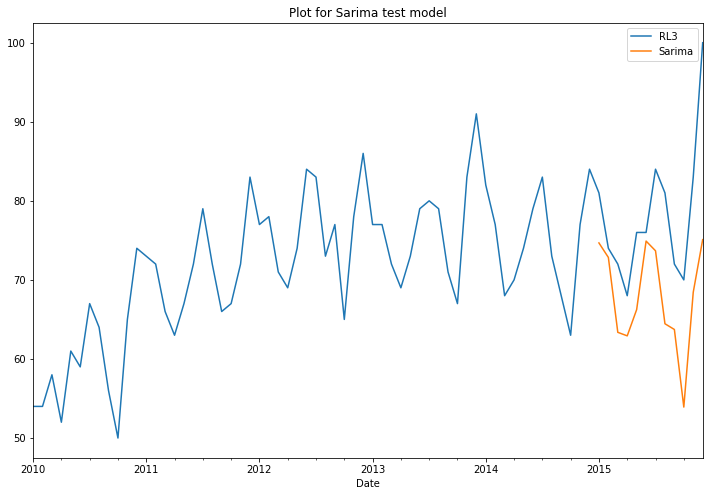

In [ ]:
## Testing model accuracy for craftbeer df
df10['Sarima']=predict_whitewine.predict(start=60,end=72,dynamic=True)
df10[['RL3','Sarima']].plot(figsize=(12,8))
plt.title('Plot for Sarima test model')
df10['Sarima'].tail(12)



*For* Whitewine forcasting test : Mean Baseline

In [ ]:
df10

,RL3,RL3 12th Difference,Sarima,Mean_Baseline,Naive_Baseline,Seasonal_Naive_Baseline,Drift_Baseline
Date,,,,,,,
2010-01-01,54,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,54,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-01,58,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,52,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-01,61,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2015-08-01,81,8.0,64.452689,NaN,NaN,NaN,NaN
2015-09-01,72,4.0,63.728519,NaN,NaN,NaN,NaN
2015-10-01,70,7.0,53.914723,NaN,NaN,NaN,NaN


In [ ]:
for i in range(60,72):
  df10.iloc[[i],2]=df10.iloc[0:60,[0]].mean()

For Whitewine forcasting test : Naive Baseline

In [ ]:
for i in range(60,72):
  df10.iloc[[i],3]=df10.iloc[[59],[0]]

For Whitewine forcasting test : Seasonal Baseline

In [ ]:
for i in range(60,72):
  df10.iloc[[i],4]=df10.iloc[[i-12],[0]]

For Whitewine forcasting test : Drift Baseline

In [ ]:
for i in range(60,72):
  df10.iloc[[i],5]= (df10.iloc[59,0])+ ( ((df10.iloc[59,0] - df10.iloc[0,0])/59 )*(i-59))

Root MeanSquare Error for Mean Baseline Model

In [ ]:
rms_white_meanbaseline=mean_squared_error(df10.iloc[60:72,[0]],df10.iloc[60:72,[2]],squared=False)
rms_white_meanbaseline


10.506862836578136

Root MeanSquare Error for Naive Baseline Model

In [ ]:
rms_white_naivebaseline=mean_squared_error(df10.iloc[60:72,[0]],df10.iloc[60:72,[3]],squared=False)
rms_white_naivebaseline


10.177589760514683

Root MeanSquare Error for Seasonal Naive Baseline Model

In [ ]:
rms_white_seasonalbaseline=mean_squared_error(df10.iloc[60:72,[0]],df10.iloc[60:72,[4]],squared=False)
rms_white_seasonalbaseline


6.224949798994366

Root MeanSquare Error for Drift Baseline Model

In [ ]:
rms_white_drfitbaseline=mean_squared_error(df10.iloc[60:72,[0]],df10.iloc[60:72,[5]],squared=False)
rms_white_drfitbaseline


11.965832610088896

Root MeanSquare Error for Sarima Model

In [ ]:
rms_white_sarima=mean_squared_error(df10.iloc[60:72,[0]],df10.iloc[60:72,[1]],squared=False)
rms_white_sarima


75.1054813800786

In [ ]:
Root_Meansquare_Value = {'RMS_seasonalbaseline':'6.2','RMS_naivebaseline':'10.17','RMS_Mean_Baseline':'10.50','RMS_drfitbaseline':'11.96','RMS_Sarima':'12.17'}
Root_Meansquare_Value

{'RMS_seasonalbaseline': '6.2',
 'RMS_naivebaseline': '10.17',
 'RMS_Mean_Baseline': '10.50',
 'RMS_drfitbaseline': '11.96',
 'RMS_Sarima': '12.17'}

In [ ]:
df_rms = pd.DataFrame(list(Root_Meansquare_Value.items()), columns = ['Model Name', 'RMSE Value'])
df_rms


,Model Name,RMSE Value
0,RMS_seasonalbaseline,6.2
1,RMS_naivebaseline,10.17
2,RMS_Mean_Baseline,10.50
3,RMS_drfitbaseline,11.96
4,RMS_Sarima,12.17


Plotting a graph for root mean square values for all models

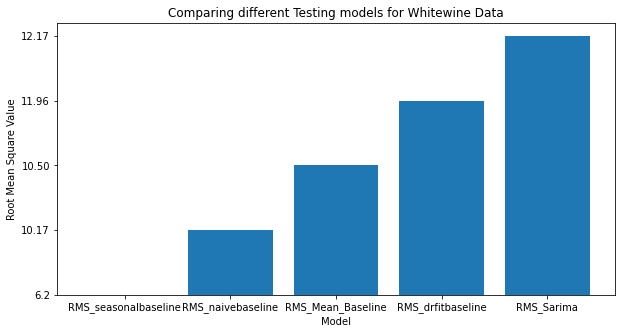

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df_rms['Model Name'],df_rms['RMSE Value'])
plt.xlabel("Model")
plt.ylabel("Root Mean Square Value")
plt.title("Comparing different Testing models for Whitewine Data")
plt.show()

Forecast plot for Mean Baseline testing model

Text(0.5, 1.0, 'Testing plot for Meanbaseline model')

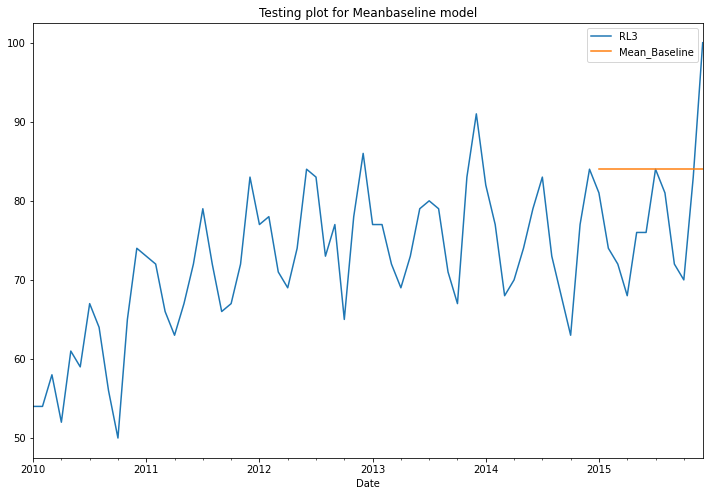

In [ ]:
df10[['RL3','Mean_Baseline']].plot(figsize=(12,8))
plt.title('Testing plot for Meanbaseline model')

Forecast plot for Naive Baseline testing model

Text(0.5, 1.0, 'Testing plot for Naive Baseline model')

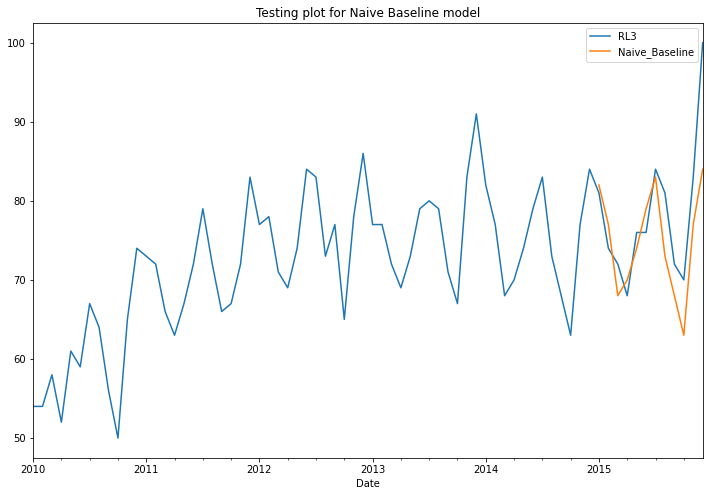

In [ ]:
df10[['RL3','Naive_Baseline']].plot(figsize=(12,8))
plt.title('Testing plot for Naive Baseline model')

Forecast plot for Seasonal Naive Baseline testing model

Text(0.5, 1.0, 'Testing plot for Seasonal Naive model')

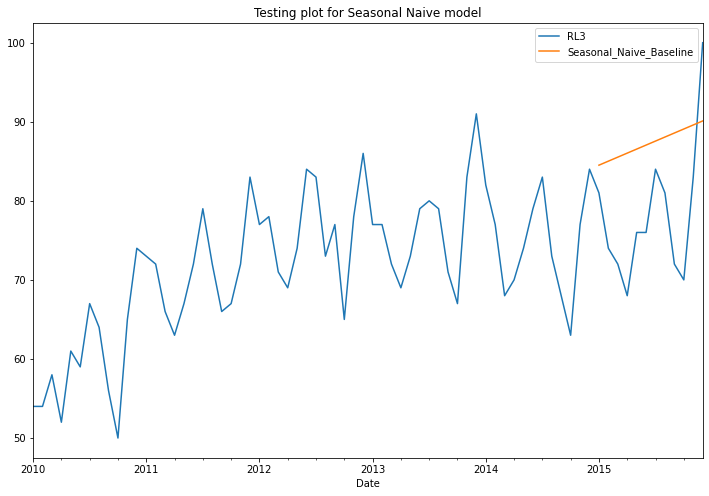

In [ ]:
df10[['RL3','Seasonal_Naive_Baseline']].plot(figsize=(12,8))
plt.title('Testing plot for Seasonal Naive model')

Forecast plot for Drift Baseline testing model

Text(0.5, 1.0, 'Testing plot for Drift Baseline model')

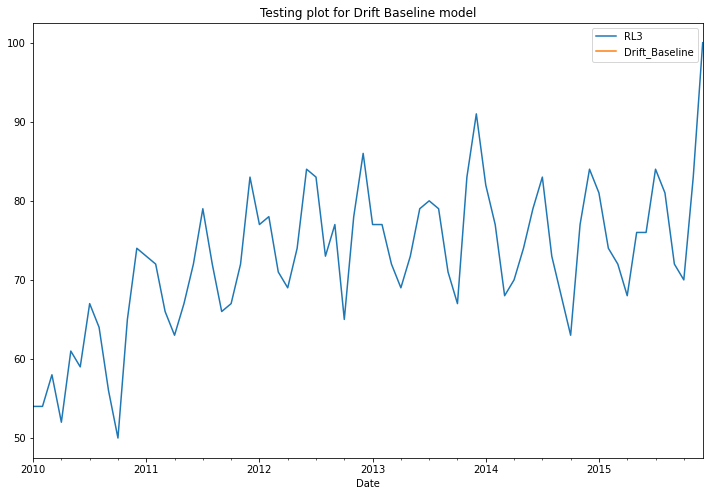

In [ ]:
df10[['RL3','Drift_Baseline']].plot(figsize=(12,8))
plt.title('Testing plot for Drift Baseline model')

Clearly Seasonal Naive Baseline Model has the least root mean square, so we can go ahead by using SARIMA model for future forecasting but we will forecast using other models also

In [ ]:
future_dates=[df8.index[-1]+ DateOffset(months=x)for x in range(0,13)]
df8.tail(24)

,RL3,Sarima,Mean_Baseline,Naive_Baseline,Seasonal_Naive_Baseline,Drift_Baseline
Date,,,,,,
2014-01-01,82,NaN,NaN,NaN,NaN,NaN
2014-02-01,77,NaN,NaN,NaN,NaN,NaN
2014-03-01,68,NaN,NaN,NaN,NaN,NaN
2014-04-01,70,NaN,NaN,NaN,NaN,NaN
2014-05-01,74,NaN,NaN,NaN,NaN,NaN
2014-06-01,79,NaN,NaN,NaN,NaN,NaN
2014-07-01,83,NaN,NaN,NaN,NaN,NaN
2014-08-01,73,NaN,NaN,NaN,NaN,NaN
2014-09-01,68,NaN,NaN,NaN,NaN,NaN


In [ ]:
future_datest_df8=pd.DataFrame(index=future_dates[1:],columns=df8.columns)
future_datest_df8

,RL3,Sarima,Mean_Baseline,Naive_Baseline,Seasonal_Naive_Baseline,Drift_Baseline
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
future_df8=pd.concat([df8,future_datest_df8])

In [ ]:
future_df8['Sarima'] = result_whitewine.predict(start = 72, end = 84, dynamic= True)  



In [ ]:
future_df8.tail(24)

,RL3,Sarima,Mean_Baseline,Naive_Baseline,Seasonal_Naive_Baseline,Drift_Baseline
2015-01-01,81,NaN,NaN,NaN,NaN,NaN
2015-02-01,74,NaN,NaN,NaN,NaN,NaN
2015-03-01,72,NaN,NaN,NaN,NaN,NaN
2015-04-01,68,NaN,NaN,NaN,NaN,NaN
2015-05-01,76,NaN,NaN,NaN,NaN,NaN
2015-06-01,76,NaN,NaN,NaN,NaN,NaN
2015-07-01,84,NaN,NaN,NaN,NaN,NaN
2015-08-01,81,NaN,NaN,NaN,NaN,NaN
2015-09-01,72,NaN,NaN,NaN,NaN,NaN
2015-10-01,70,NaN,NaN,NaN,NaN,NaN


Forecasting using Mean Baseline

In [ ]:
for i in range(72,84):
  future_df8.iloc[[i],2]=future_df8.iloc[0:72,[0]].mean()

Forecasting for Naive Baseline

In [ ]:
for i in range(72,84):
  future_df8.iloc[[i],3]=future_df8.iloc[[71],[0]]

Forecasting for Seasonal Naive Baseline

In [ ]:
for i in range(72,84):
  future_df8.iloc[[i],4]=future_df8.iloc[[i-12],[0]]

Forecasting for Drift Baseline

In [ ]:
for i in range(72,84):
  future_df8.iloc[[i],5]= (future_df8.iloc[59,0])+ ( ((future_df8.iloc[59,0] - future_df8.iloc[0,0])/59 )*(i-59))

Future Forecast plot using Sarima Model

In [ ]:
future_df8.tail(24)

,RL3,Sarima,Mean_Baseline,Naive_Baseline,Seasonal_Naive_Baseline,Drift_Baseline
2015-01-01,81,NaN,NaN,NaN,NaN,NaN
2015-02-01,74,NaN,NaN,NaN,NaN,NaN
2015-03-01,72,NaN,NaN,NaN,NaN,NaN
2015-04-01,68,NaN,NaN,NaN,NaN,NaN
2015-05-01,76,NaN,NaN,NaN,NaN,NaN
2015-06-01,76,NaN,NaN,NaN,NaN,NaN
2015-07-01,84,NaN,NaN,NaN,NaN,NaN
2015-08-01,81,NaN,NaN,NaN,NaN,NaN
2015-09-01,72,NaN,NaN,NaN,NaN,NaN
2015-10-01,70,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Future Forecast plot for Sarima Model')

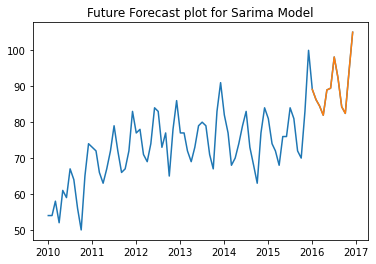

In [ ]:
plt.plot(future_df8.index,future_df8[['RL3','Sarima']].max(axis=1))
plt.plot(future_df8.index,future_df8['Sarima'])
plt.title('Future Forecast plot for Sarima Model')

Future Forecast plot using Mean Baseline Model

Text(0.5, 1.0, 'Future Forecast plot for Mean Baseline Model')

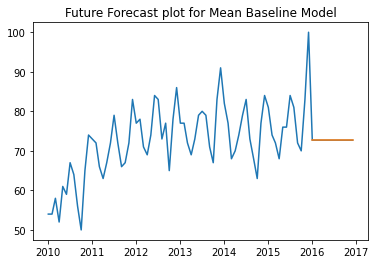

In [ ]:
plt.plot(future_df8.index,future_df8[['RL3','Mean_Baseline']].max(axis=1))
plt.plot(future_df8.index,future_df8['Mean_Baseline'])
plt.title('Future Forecast plot for Mean Baseline Model')

Future Forecast plot using Naive Baseline Model

Text(0.5, 1.0, 'Future Forecast plot for Naive Baseline Model')

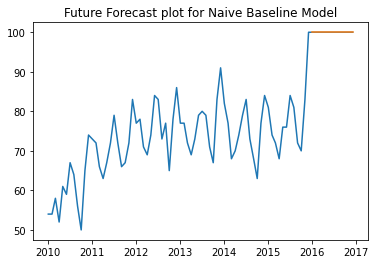

In [ ]:
plt.plot(future_df8.index,future_df8[['RL3','Naive_Baseline']].max(axis=1))
plt.plot(future_df8.index,future_df8['Naive_Baseline'])
plt.title('Future Forecast plot for Naive Baseline Model')

Future Forecast plot using Seasonal Naive Baseline Model

Text(0.5, 1.0, 'Future Forecast plot for Seasonal Naive Baseline Model')

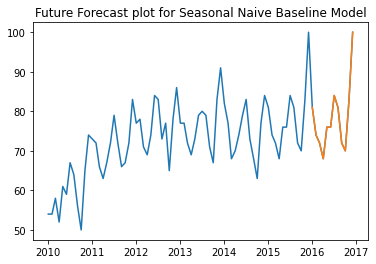

In [ ]:
plt.plot(future_df8.index,future_df8[['RL3','Seasonal_Naive_Baseline']].max(axis=1))
plt.plot(future_df8.index,future_df8['Seasonal_Naive_Baseline'])
plt.title('Future Forecast plot for Seasonal Naive Baseline Model')

Future Forecast plot using Seasonal Drift Baseline Model

Text(0.5, 1.0, 'Future Forecast plot for Drift Model')

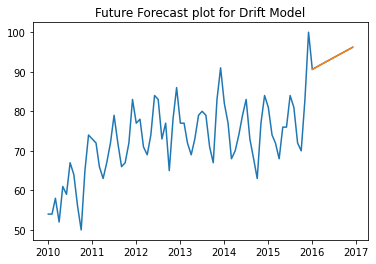

In [ ]:
plt.plot(future_df8.index,future_df8[['RL3','Drift_Baseline']].max(axis=1))
plt.plot(future_df8.index,future_df8['Drift_Baseline'])
plt.title('Future Forecast plot for Drift Model')